<a href="https://colab.research.google.com/github/HaHuyHoang19146188/BAII-TAP-AI/blob/main/Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import thư viện
import numpy as np
import pandas as pd
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import dropout

In [ ]:
#chia dữ liệu thành 2 tập train, test
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
#quan sát dữ liệu
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
# x_test,x_train là mảng 4 chiều để chuyển về 2 chiều ta lấy 32*32*3
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
#chuẩn hóa 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
#chuyển y thành 10 class
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
# tạo mạng noron
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               1573376   
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [ ]:
#chạy mô hình
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)])

Epoch 1/500
313/313 [==============================] - 14s 42ms/step - loss: 2.1546 - accuracy: 0.2193 - val_loss: 1.9338 - val_accuracy: 0.2989
Epoch 2/500
313/313 [==============================] - 13s 41ms/step - loss: 1.9057 - accuracy: 0.3090 - val_loss: 1.8240 - val_accuracy: 0.3392
Epoch 3/500
313/313 [==============================] - 13s 43ms/step - loss: 1.8314 - accuracy: 0.3408 - val_loss: 1.9361 - val_accuracy: 0.2959
Epoch 4/500
313/313 [==============================] - 13s 41ms/step - loss: 1.7831 - accuracy: 0.3579 - val_loss: 1.7838 - val_accuracy: 0.3651
Epoch 5/500
313/313 [==============================] - 13s 42ms/step - loss: 1.7541 - accuracy: 0.3721 - val_loss: 1.7573 - val_accuracy: 0.3694
Epoch 6/500
313/313 [==============================] - 13s 41ms/step - loss: 1.7172 - accuracy: 0.3850 - val_loss: 1.8115 - val_accuracy: 0.3621
Epoch 7/500
313/313 [==============================] - 13s 42ms/step - loss: 1.6931 - accuracy: 0.3946 - val_loss: 1.6969 - val_ac

In [ ]:
#đánh giá mô hình
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  1.7539557218551636
Độ chính xác kiểm tra là:  0.4848000109195709


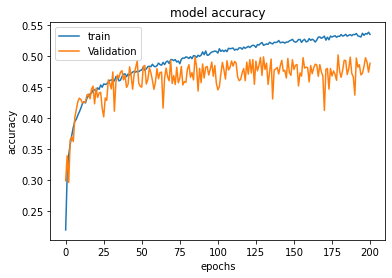

In [ ]:
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()